## 9.3 Combining and Differencing
### 9.3.1 Normalized Difference Vegetation Index

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np, numpy.ma as ma

In [2]:
# Import veggie channel (ABI Channel 3)
fname = 'data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C03_G16_s20192091147504_e20192091147562_c20192091148025.nc'
goesnc = Dataset(fname, 'r')
veggie = goesnc.variables['Rad'][:]

# Import red channel (ABI Channel 2)
fname = 'data/goes-meso/ndvi/OR_ABI-L1b-RadM1-M6C02_G16_s20192091147504_e20192091147562_c20192091147599.nc'
goesnc = Dataset(fname, 'r')
red = goesnc.variables['Rad'][:]

In [3]:
red = red[::2, ::2]

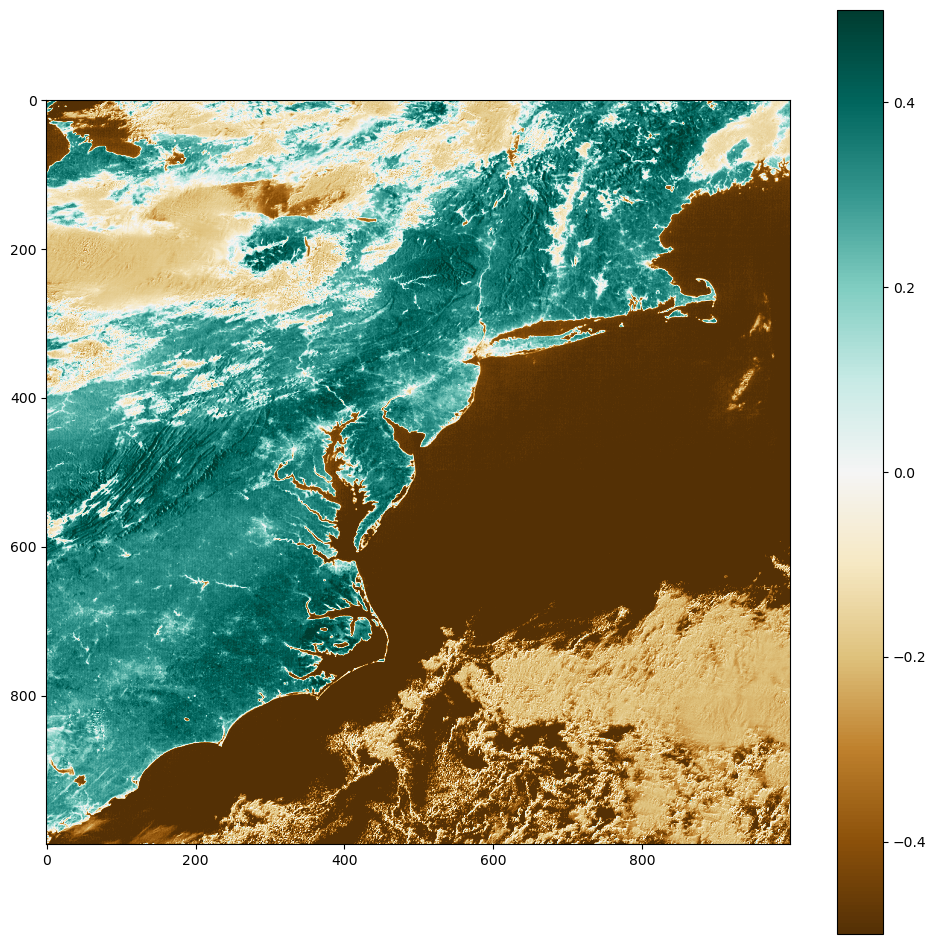

In [4]:
img = (veggie-red)/(veggie+red)

plt.figure(figsize=[12,12])
plt.imshow(img, vmin=-0.5, vmax=0.5, cmap=plt.get_cmap("BrBG"))
plt.colorbar()
plt.show()

In [5]:
fname = 'data/goes-meso/ndvi/OR_ABI-L2-ACMM1-M6_G16_s20192091147504_e20192091147562_c20192091148155.nc'
goesnc = Dataset(fname, 'r')
cloud_mask = goesnc.variables['BCM'][:]

In [6]:
cloud_mask_big = np.repeat(np.repeat(cloud_mask, 2, axis=1), 2, axis=0)

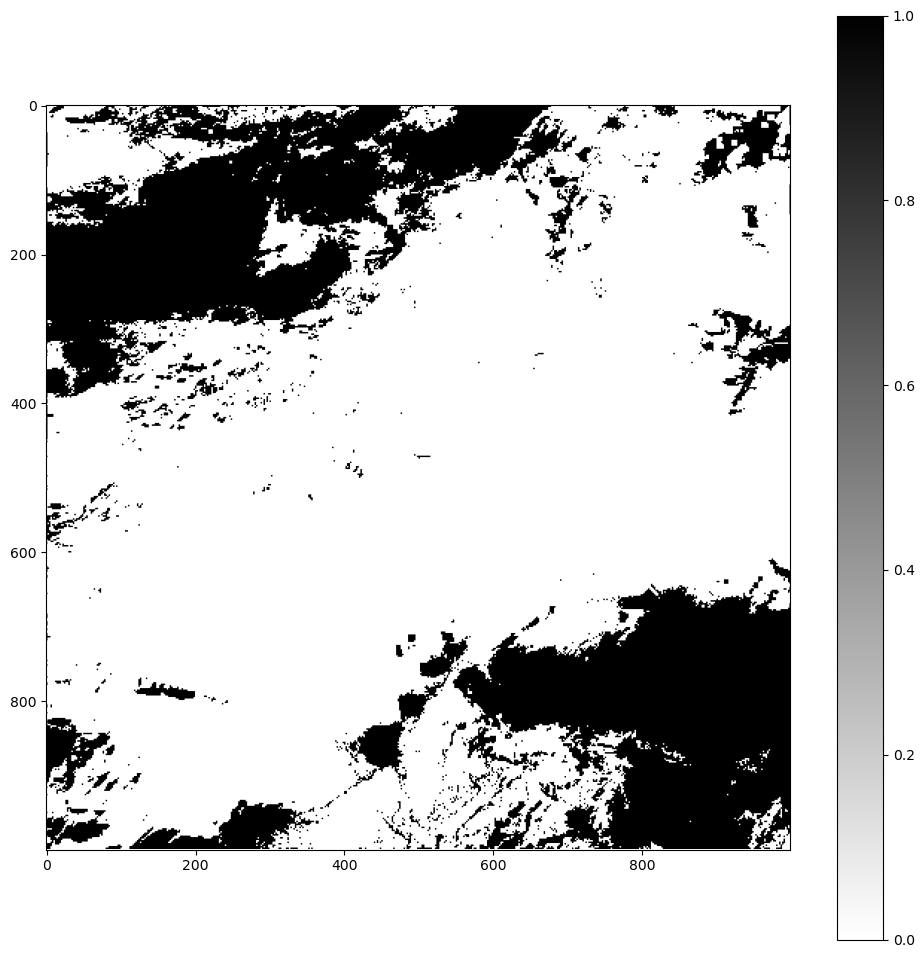

In [7]:
plt.figure(figsize=[12,12])
plt.imshow(cloud_mask_big, cmap=plt.get_cmap("binary"))
plt.colorbar()
plt.show()

In [8]:
imgMasked = ma.masked_array(img, mask=cloud_mask_big, fill_value=np.nan)

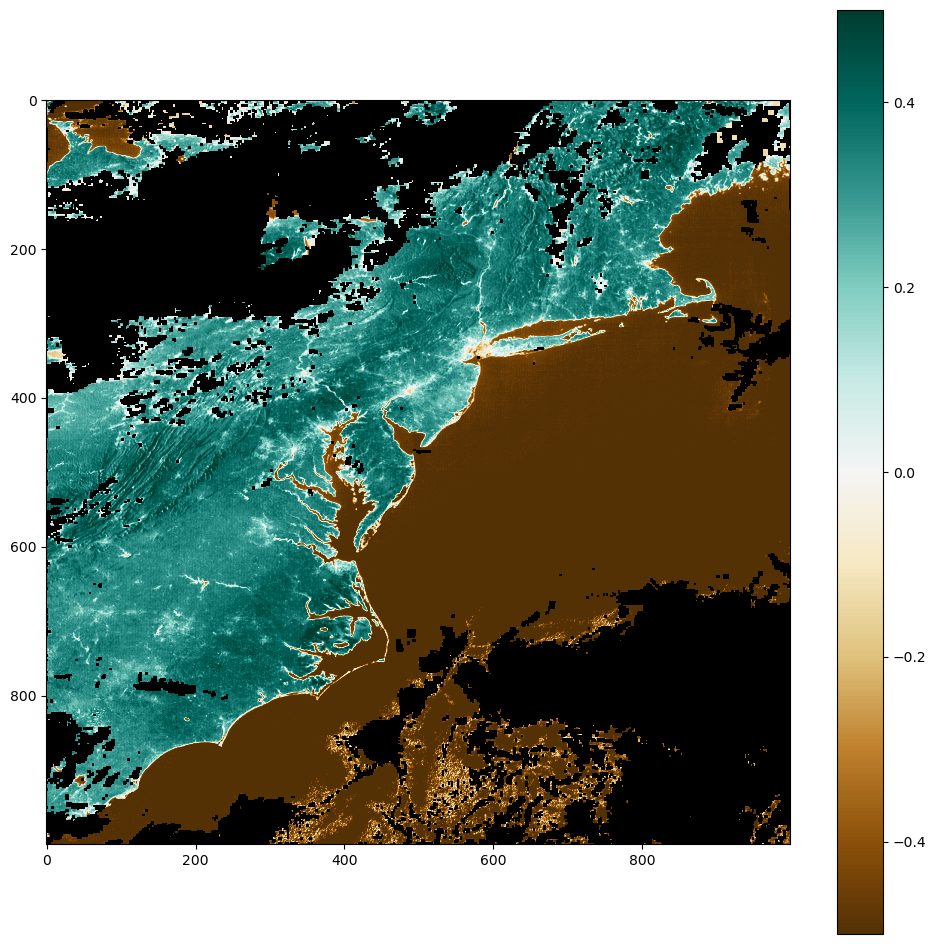

In [9]:
plt.figure(figsize=[12,12])
plt.imshow(ma.filled(imgMasked), vmin=-0.5, vmax=0.5, cmap=plt.get_cmap("BrBG"))
plt.gca().set_facecolor("black")

plt.colorbar()
plt.show()

### 9.3.2 GOES-16 Sandwich Product

In [10]:
# Import veggie channel (ABI Channel 13, 10.3)
fname = "data/goes-meso/michael/OR_ABI-L1b-RadM1-M3C13_G16_s20182822019282_e20182822019350_c20182822019384.nc"
g16nc = Dataset(fname, 'r')
C13 = g16nc.variables['Rad'][:]

# Import red channel (ABI Channel 2, .64)
fname = "data/goes-meso/michael/OR_ABI-L1b-RadM1-M3C02_G16_s20182822019282_e20182822019339_c20182822019374.nc"
g16nc = Dataset(fname, 'r')
C02 = g16nc.variables['Rad'][:]
C02 = C02[::4, ::4]

sandwich = C02 - C13

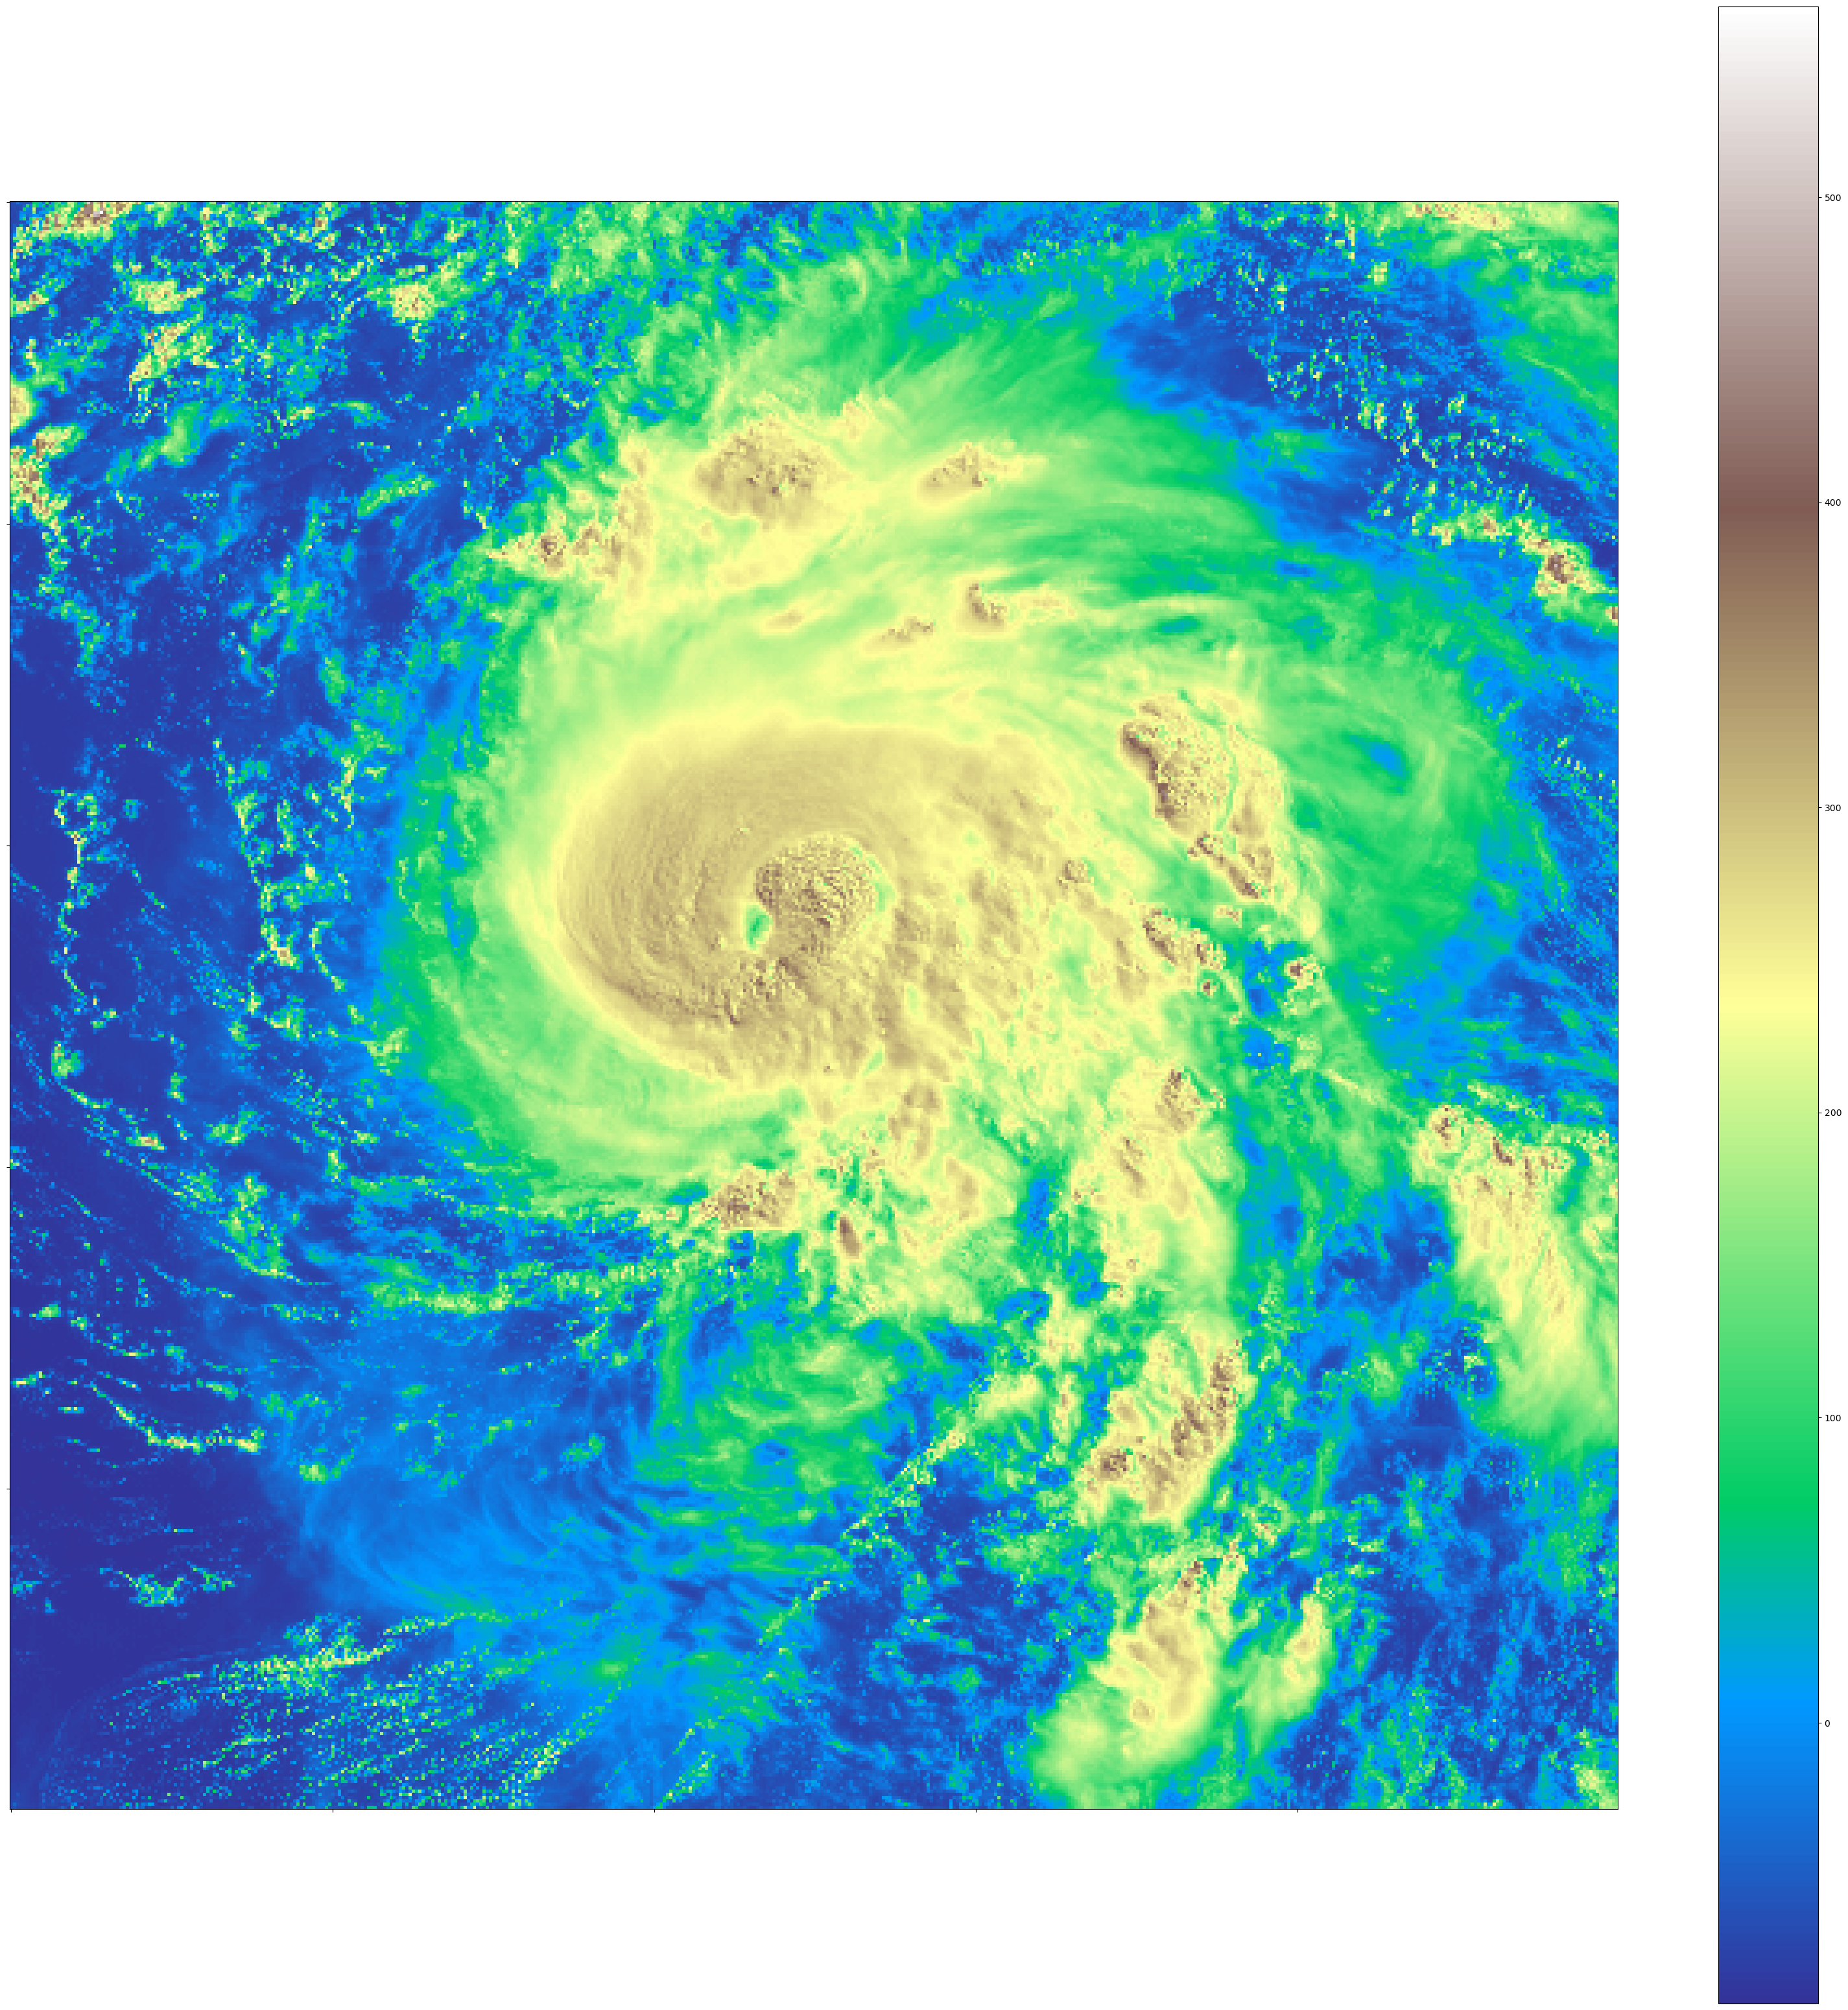

In [12]:
plt.figure(figsize=[40,40])
plt.imshow(sandwich, cmap=plt.get_cmap("terrain"))
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.colorbar()
plt.show()
# plt.close()

## 9.4 RGB

In [ ]:
from skimage.exposure import adjust_gamma, rescale_intensity

In [ ]:
# Import blue channel (ABI Channel 1)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C01_G17_s20191501801013_e20191501801070_c20191501801105.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
blue = adjust_gamma(refl, 0.5)

# Import veggie channel (ABI Channel 3)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C03_G17_s20191501801013_e20191501801070_c20191501801103.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
veggie = adjust_gamma(refl, 0.5)

In [ ]:
# Import red channel (ABI Channel 2)
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C02_G17_s20191501801013_e20191501801070_c20191501801097.nc'
g17nc = Dataset(fname, 'r')
refl = g17nc.variables['Rad'][:]
refl = refl[::2, ::2]
red = adjust_gamma(refl, 0.5)

In [ ]:
green = 0.45*red + 0.45*blue + 0.1*veggie

In [ ]:
r = ma.filled(red)
g = ma.filled(green)
b = ma.filled(blue)

rgb = np.stack([r, g, b], axis=2)
rgb = adjust_gamma(rgb, 0.5)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=[15,5])

cmap='tab20c'
vmin=5
vmax=25

im = axes[0].imshow(r, vmin=vmin, vmax=vmax, cmap=cmap)
axes[0].set_title("Red")

im = axes[1].imshow(g, vmin=vmin, vmax=vmax, cmap=cmap)
axes[1].set_title("Green")

im = axes[2].imshow(b, vmin=vmin, vmax=vmax, cmap=cmap)
axes[2].set_title("Blue")

[ax.set_axis_off() for ax in axes]

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.75)
plt.show()


In [ ]:
# Normalize values to 1
plt.figure(figsize=[12,12])
rgb255 = rescale_intensity(rgb, out_range=(0, 1.0))
plt.imshow(rgb255)
plt.gca().set_axis_off()
plt.show()


### 9.4.2 Dust RGB

In [ ]:
ddir = 'data/goes-meso/fires/'
fname = ddir+'OR_ABI-L1b-RadM2-M6C11_G17_s20191501801013_e20191501801070_c20191501801110.nc'
g17nc = Dataset(fname, 'r')
btC11 = g17nc.variables['Rad'][:]

fname = ddir+'OR_ABI-L1b-RadM2-M6C14_G17_s20191501801013_e20191501801070_c20191501801113.nc'
g17nc = Dataset(fname, 'r')
btC13 = g17nc.variables['Rad'][:]

fname = ddir+'OR_ABI-L1b-RadM2-M6C15_G17_s20191501801013_e20191501801076_c20191501801112.nc'
g17nc = Dataset(fname, 'r')
btC15 = g17nc.variables['Rad'][:]

In [ ]:
img = btC15-btC13
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
red = adjust_gamma(img, 1.0)

img = btC13-btC11
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
green = adjust_gamma(img, 2.5)

img = btC13
# Rescale and adjust gamma
img = rescale_intensity(img, out_range=(0, 1))
blue = adjust_gamma(img, 1.0)

In [ ]:
r = ma.filled(red, fill_value=0)
g = ma.filled(green, fill_value=0)
b = ma.filled(blue, fill_value=0)

rgb = np.stack([r, g, b], axis=2)

In [ ]:
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.gca().set_axis_off()
plt.show()

### 9.4.3 Fire/Natural RGB

In [ ]:
fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C05_G17_s20191501801013_e20191501801070_c20191501801105.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
red = rescale_intensity(img, out_range=(0, 1))

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C03_G17_s20191501801013_e20191501801070_c20191501801103.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
green = rescale_intensity(img, out_range=(0, 1))

fname = 'data/goes-meso/fires/OR_ABI-L1b-RadM2-M6C02_G17_s20191501801013_e20191501801070_c20191501801097.nc'
g17nc = Dataset(fname, 'r')
img = g17nc.variables['Rad'][:]
img = img[::2, ::2]
blue = rescale_intensity(img, out_range=(0, 1))

In [ ]:
r = ma.filled(red, fill_value=0)
g = ma.filled(green, fill_value=0)   
b = ma.filled(blue, fill_value=0)

rgb = np.stack([r, g, b], axis=2)

In [ ]:
plt.figure(figsize=[12,12])
plt.imshow(rgb)
plt.gca().set_axis_off()
plt.show()

## 9.5 Matching with Surface Observations

In [ ]:
import cartopy.crs as ccrs

fname = 'data/goes-meso/matchup/OR_ABI-L2-DSRM1-M6_G16_s20192091300534_e20192091300591_c20192091303116.nc'
goes = Dataset(fname, 'r')
dsr = goes.variables['DSR'][:,:]
lat = goes.variables['lat'][:]
lon = goes.variables['lon'][:]

x,y = np.meshgrid(lon, lat)

In [ ]:
plt.figure(figsize=[8,8])

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')

plt.contourf(x, y, dsr)
plt.colorbar()

plt.scatter(-77.93, 40.72, marker='x', c='black', s=100)
ax.set_ylim(34, 45)
ax.set_xlim(-80, -70)

plt.show()

### 9.5.1 With user-defined functions

In [ ]:
def haversine(deglat1, deglon1, deglat2, deglon2):
    ''' This function uses the haversine formula to calculate the distance between
    two latitude and longitude coordinates and returns the distance in km.
    '''
    r_earth = 6378.0
    
    lat1 = np.radians(deglat1)
    lat2 = np.radians(deglat2)
    
    long1 = np.radians(deglon1)
    long2 = np.radians(deglon2)
      
    a = np.sin(0.5*(lat2-lat1))
    b = np.sin(0.5*(long2-long1))
    
    dist = r_earth*2.0*np.arcsin(np.sqrt(a*a+np.cos(lat1)*np.cos(lat2)*b*b))
    
    return dist

In [ ]:
def matchup_spatial(latitude, longitude, site_lat, site_lon, 
        radius_km=50.0, closest_only=False):
    ''' This function calcualtes the distance between a list of retrieval coordinates and
    and a point observation. It returns all matches that are within a given radius or the
    closest point.
    '''
    
    # Find index for pixels within radius_km around ground site  
    distance_matrix = np.full(latitude.shape,  6378.0)

    # Calculate the distance in degrees
    dist_deg = np.sqrt((np.array(latitude)-site_lat)**2
        +(np.array(longitude)-site_lon)**2)
    close_pts = (dist_deg < 1.0)
    
    # Replace angle distance with km distance
    distance_matrix[close_pts] = haversine(site_lat, site_lon, 
        latitude[close_pts], longitude[close_pts])
    keep_index = (distance_matrix > radius_km)
    
    # Return a single (closest) value
    #if closest_only:
    #    if len(keep_index[keep_index==True]) > 0:
    #        keep_index = (distance_matrix == distance_matrix.min())
   
    return keep_index

In [ ]:
mask = matchup_spatial(y, x, 40.72, -77.93, radius_km=100.0, closest_only=True)

In [ ]:
dsr[mask]

In [ ]:
dsrMA = np.ma.masked_array(dsr, mask=mask)
xMA = np.ma.masked_array(x, mask=mask)
yMA = np.ma.masked_array(y, mask=mask)

In [ ]:
plt.figure(figsize=[8,8])
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m')
plt.contourf(xMA, yMA, dsrMA)
plt.colorbar()
plt.scatter(-77.93, 40.72, marker='x', c='black', s=100)

ax.set_ylim(32, 45)
ax.set_xlim(-80, -70)
ax.set_aspect('equal')

plt.show()

In [ ]:
import pandas as pd

fname = 'data/goes-meso/matchup/surfrad_header.txt'
header = pd.read_csv(fname)

fname = 'data/goes-meso/matchup/psu19209.dat'
ground = pd.read_csv(fname, skipinitialspace=True, delim_whitespace=True, \
             skiprows=2, header=None, names=list(header))

In [ ]:
# Surface obs time
df = pd.DataFrame({'year': ground['year'], 'month': ground['month'], 'day': ground['day'], \
                  'hour': ground['hour'], 'minute' : ground['min']})

In [ ]:
# List of ground observation times
ground['Datetime'] = pd.to_datetime(df)

# Satellite observation time
fmt = '%Y-%m-%dT%H:%M'
fileTime = pd.to_datetime(goes.time_coverage_start[0:19], format=fmt)

In [ ]:
def matchup_temporal(time, time_array, matchup_max_time_mins=15):
    time_diff = [np.abs(x - time) for x in time_array]
    index = np.argmin(time_diff)
    
    if abs(time_array[index] - time) < pd.Timedelta(minutes=15):
        return index
    else:
        return -1

In [ ]:
index = matchup_temporal(fileTime, ground['Datetime'] )
print(index)

In [ ]:
ground['dw_solar'][index] - dsrMA.mean()

### 9.5.2 With Machine Learning

NOTE: The ```sklearn``` package was originally left out of the environment.yml file. If you downloaded an older version of this repository, please install this package into the ```earthsciviz``` environment using:

```
conda install -c conda-forge sklearn
```
The environment.yml has since been updated.

Since the book has been published, the syntax has changed in newer versions of sklearn. The import path ```sklearn.neighbors.DistanceMetric``` has been moved to ```sklearn.metrics.DistanceMetric```. The code below reflects a more recent version of sklearn.


In [ ]:
from sklearn.metrics import DistanceMetric

In [ ]:
samples = [[i, j] for i in lat for j in lon]
point = [[40.72, -77.93]]

In [ ]:
dist = DistanceMetric.get_metric('haversine')

In [ ]:
# Convert to radians
def deg_to_rad(pairs):
    return [[np.radians(x[0]), np.radians(x[1])] for x in pairs]

point_rad = deg_to_rad(point)
samples_rad = deg_to_rad(samples)

In [ ]:
distances = dist.pairwise(point_rad, samples_rad)[0]*6356
distances_2d = distances.reshape(dsr.shape)

In [ ]:
distances_2d.shape

In [ ]:
mask_sk2d = distances_2d > 100

dsrMA_sk = np.ma.masked_array(dsr, mask=mask_sk2d)
xMA_sk = np.ma.masked_array(x, mask=mask_sk2d)
yMA_sk = np.ma.masked_array(y, mask=mask_sk2d)

In [ ]:
proj = dict(projection=ccrs.PlateCarree())
fig, axes = plt.subplots(ncols = 2, figsize=[8,12], subplot_kw=proj)

axes[0].set_title("Distance from "+str(point[0]))
axes[0].pcolormesh(x, y, distances_2d, vmin=0, vmax=900)

axes[1].set_title("Matches < 100 km from "+str(point[0]))
axes[1].contourf(xMA_sk, yMA_sk, dsrMA_sk)

for axis in axes:
    axis.coastlines('50m')
    axis.set_ylim(32, 45)
    axis.set_xlim(-80, -70)
    axis.scatter(-77.93, 40.72, marker='x', c='black', s=100)
    axis.set_aspect('equal')
    
plt.show()